<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">

# Basic Visualization

At the end of this lesson you will learn:

1. how to use xarray's convenient [matplotlib-backed](https://matplotlib.org/) plotting interface to
   visualize your datasets.
2. that `hvplot` provides an equally convenient interface for bokeh-backed plots

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%config InlineBackend.figure_format='retina'

## Load data

First let's load up a tutorial dataset to visualize.


In [2]:
ds = xr.tutorial.open_dataset("air_temperature_gradient")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float32 ...
    dTdx     (time, lat, lon) float32 ...
    dTdy     (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

This dataset has three "data variables", `Tair` is air temperature and `dTdx`
and `dTdy` are horizontal gradients of this temperature field. All three "data
variables" are three-dimensional with dimensions `(time, lat, lon)`.


<a id='basic'></a>

## Basic plotting: .plot()

DataArray objects have a [plot](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.plot.html) method. This method creates plots using
`matplotlib` so all of your existing matplotlib knowledge carries over!

By default `.plot()` makes

1. a line plot for 1-D arrays using `plt.plot()`
2. a `pcolormesh` plot for 2-D arrays using `plt.pcolormesh()`
3. a histogram for everything else using `plt.hist()`


<a id='hist'></a>

## Histograms

`Tair` is three-dimensional, so we got a histogram of temperature values. Notice
the label on the x-axis. One of xarray's convenient plotting features is that it
uses the `attrs` of `Tair` to nicely label axes and colorbars.


(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.     , 230.64   , 240.28   , 249.92   , 259.56   , 269.2    ,
        278.84   , 288.47998, 298.12   , 307.76   , 317.4    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

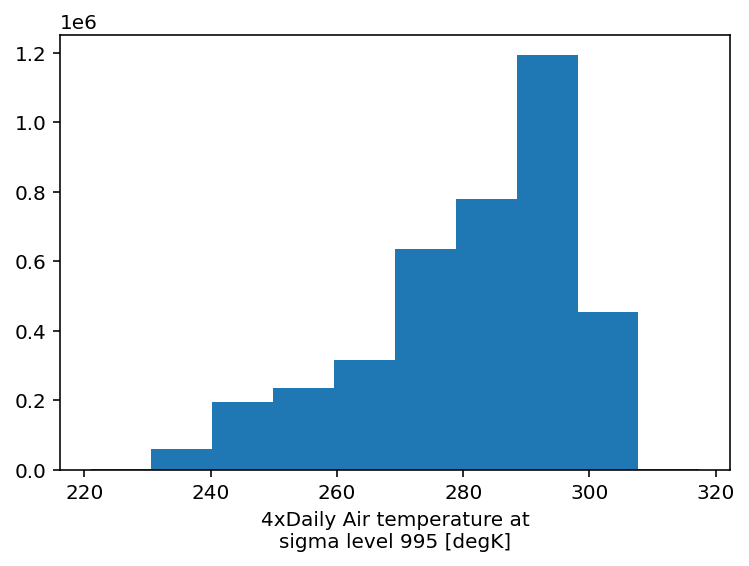

In [3]:
ds.Tair.plot()

You can pass extra arguments to the underlying `hist()` call. See the [matplotlib
docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for
all possible keyword arguments.

**Tip:** Note that the returned values are exactly what matplotlib would return

### Exercise

Update the above plot to show 50 bins with unfilled steps instead of filled
bars.


<a id='2d'></a>

## 2D plots

Now we will explore 2D plots. Let's select a single timestep of `Tair` to
visualize.


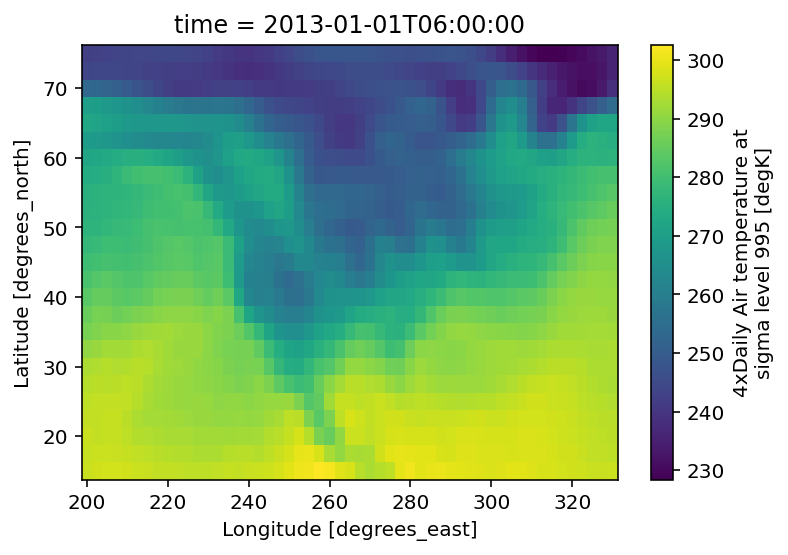

In [4]:
ds.Tair.isel(time=1).plot()

This is identical to `.plot.pcolormesh` which is more explicit

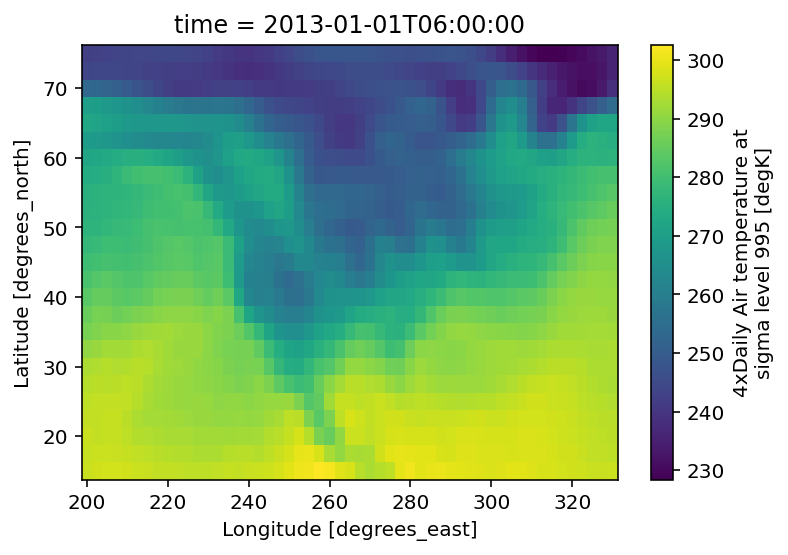

In [5]:
ds.Tair.isel(time=1).plot.pcolormesh()

Notice how much information is on that plot!

1. The x- and y-axes are labeled with full names — "Latitude", "Longitude" — along with units. 
2. The colorbar has a nice label, again with units. 
3. And the title tells us the timestamp of the data presented.

`plot.pcolormesh` takes many [keyword arguments](https://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html) and is quite sophisticated.

Here is a more complicated figure that explicitly sets `time` as the x-axis,
customizes the colorbar, and overlays two contours at specific levels.

**Tip:** Other options for 2D plots include [.plot.contour](https://xarray.pydata.org/en/stable/generated/xarray.plot.contour.html), [.plot.contourf](https://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html),
[.plot.imshow](https://xarray.pydata.org/en/stable/generated/xarray.plot.imshow.html)


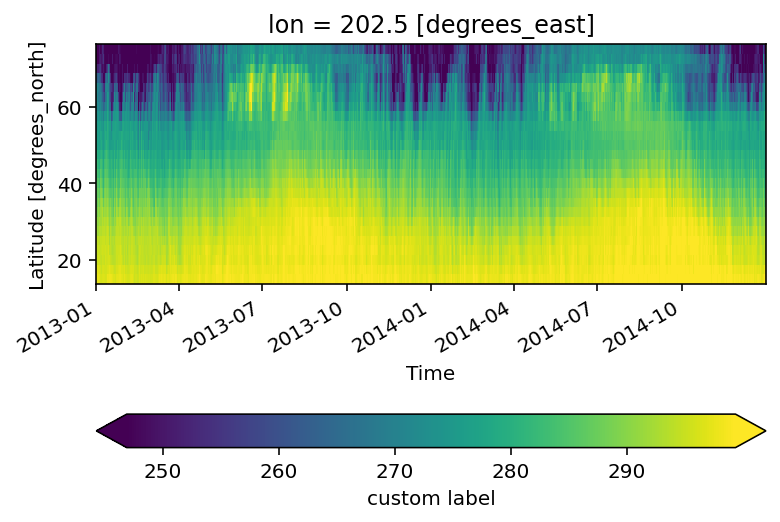

In [6]:
ds.Tair.isel(lon=1).plot(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)

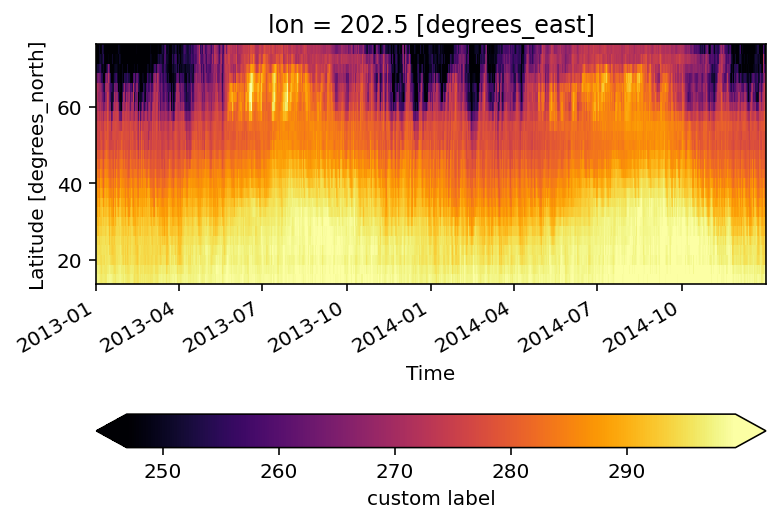

In [10]:
ds.Tair.isel(lon=1).plot(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap="inferno",
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3
    },
)

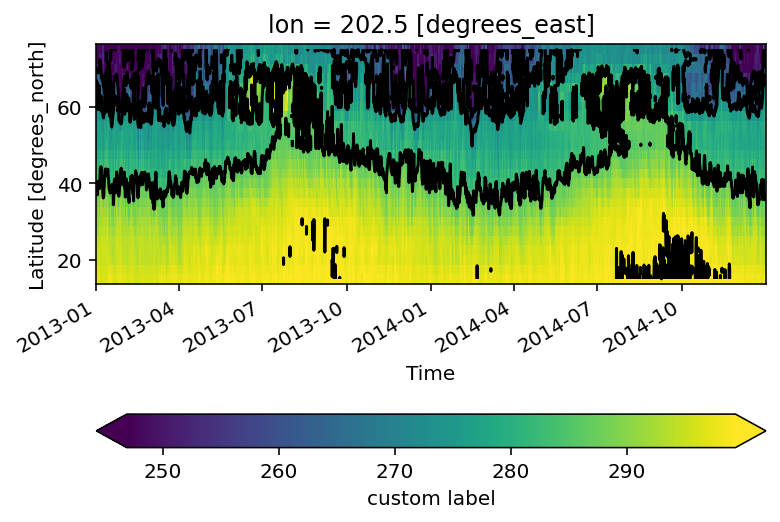

In [12]:
ds.Tair.isel(lon=1).plot.pcolormesh(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap="viridis",
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3
    },
)
ds.Tair.isel(lon=1).plot.contour(
    x="time",
    level=5,
    colors="k",
    linewidth=0.5
)

### Exercise

Update the above plot to use a different matplotlib colormap.


In [ ]:
ds.Tair.isel(lon=1).plot(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)

### Exercise

Now overlay a [contour plot](https://xarray.pydata.org/en/stable/generated/xarray.plot.contour.html) on top of the previous plot


In [ ]:
ds.Tair.isel(lon=1).plot.pcolormesh(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)
ds.Tair.isel(lon=1).plot.contour(
    x="time",  # coordinate to plot on the x-axis of the plot
    levels=5,  # autoselect 5 levels between max, min
    # The following are passed to plt.contour
    colors="k",
    linewidths=0.5,
)

<a id='1d'></a>

## 1D line plots

xarray is also able to plot lines by wrapping `plt.plot()`. As in the earlier
examples, the axes are labelled and keyword arguments can be passed to the
underlying `matplotlib` call.


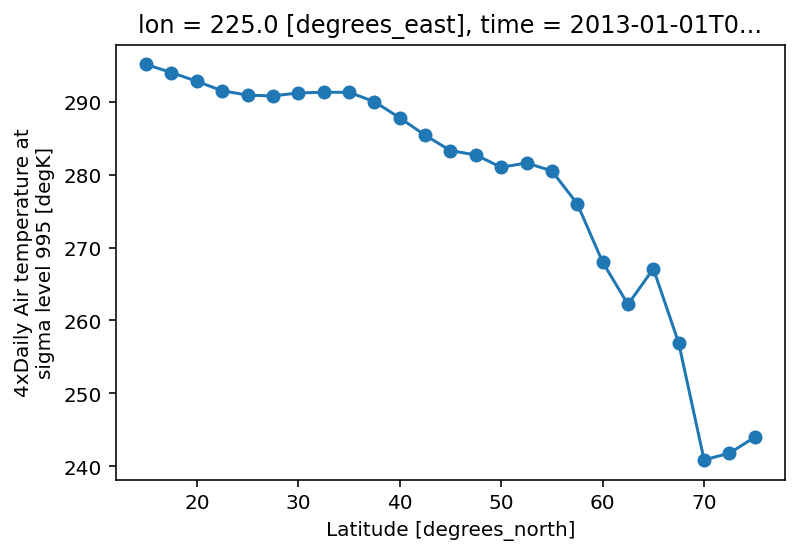

In [13]:
ds.Tair.isel(time=1, lon=10).plot(marker="o")

Again, this is equivalent to the more explicit [plot.line](https://xarray.pydata.org/en/stable/generated/xarray.plot.line.html)

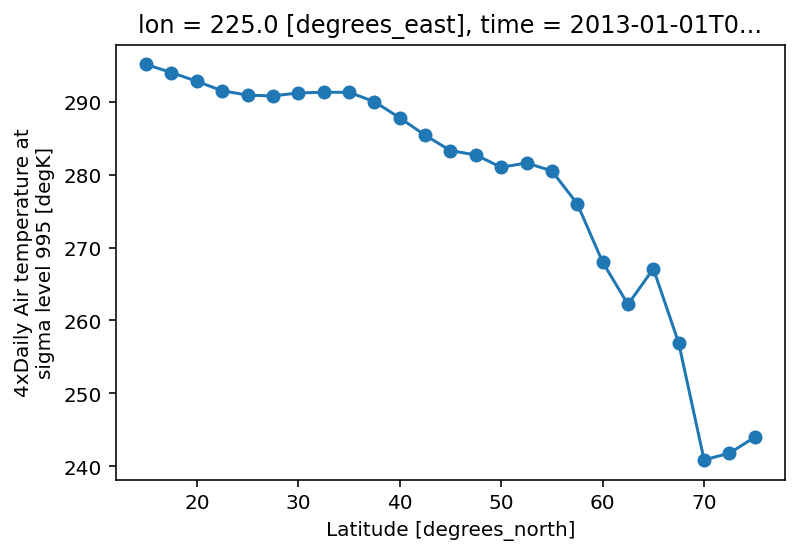

In [14]:
ds.Tair.isel(time=1, lon=10).plot.line(marker="o")

### Multiple lines with `hue` 

Lets say we want to compare line plots of temperature at three different
latitudes. We can use the `hue` kwarg to do this.


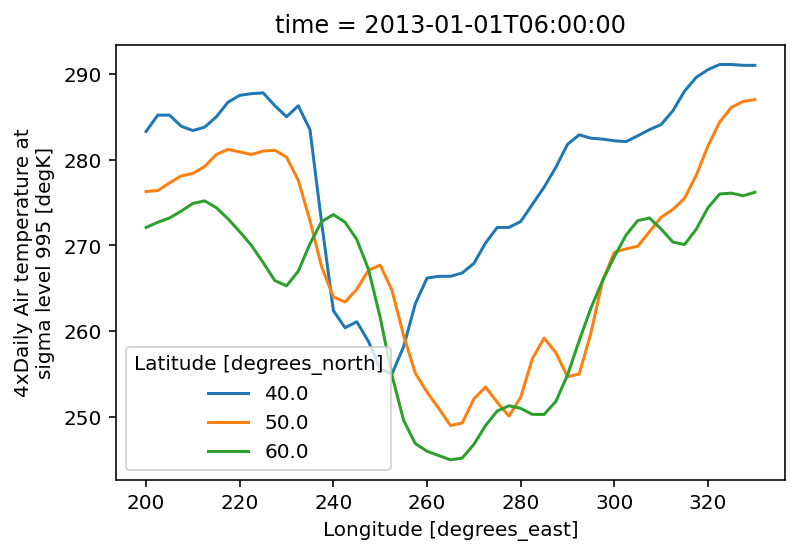

In [15]:
ds.Tair.isel(time=1).sel(lat=[40, 50, 60], method="nearest").plot(x="lon", hue="lat")

## Customization

All of xarray's plotting functions take an large list kwargs that customize
behaviour. A full list can be seen [here](https://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html). That
said xarray does not wrap all matplotlib functionality.

The general strategy for making plots that are more complicated that the
examples above is

1. Create a matplotlib axis `ax`
2. Use xarray to make a close approximation of the final plot specifying
   `ax=ax`.
3. Use `ax` methods to fully customize the plot


## More resources

1. [Xarray's visualization gallery](https://xarray.pydata.org/en/stable/examples/visualization_gallery.html)
2. [Xarray's plotting documentation](https://xarray.pydata.org/en/stable/plotting.html)

